## Business Understanding/Overview

The aviation industry is a vital component of the global economy, enabling the rapid movement of people and goods across the globe.

Aviation companies have been on an expansion spree in order to keep up with an ever increasing demand. Investing in this industry requires immense resources and therefore the need for an indepth analysis on what model of aircraft to invest in.

This analysis will utilize dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents.

## Problem Statement

The company would like to diversify its fleet of aircrafts for commercial and private business and seeks the expertise in assessing the risks associated with different aircraft models, operational conditions, and their suitability for such a venture.


## Objectives
The main objective is to identify low-risk aircraft models and operational strategies to guide the expansion in the aviation industry.

### Research Questions
1. Which aircraft models have the lowest accident and fatality rates?
2. Are there differences in risk levels based on the purpose of flight?
3. During which phase of flight do most fatal injuries occur?
4. Which aircraft engine types have the lowest accident rates?
5. Are there specific parts of the world with a higher frequency of fatal injuries?


## Methodology

For this analysis,CRISP-DM framework has been used.

## Success Criteria
1. Total fatalities linked to each aircraft model.
2. Number of recorded incidents for each model.
3. The proportion of fatalities to total incidents for each model.

## Limitations
1. Missing and incomplete Data
2. Lack of operational hours for each aircraft
3. Investment budget for expansion not provided

## Data Understanding

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [19]:
data = pd.read_csv('/content/AviationData.csv', encoding='latin1')
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [4]:
data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Columns
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

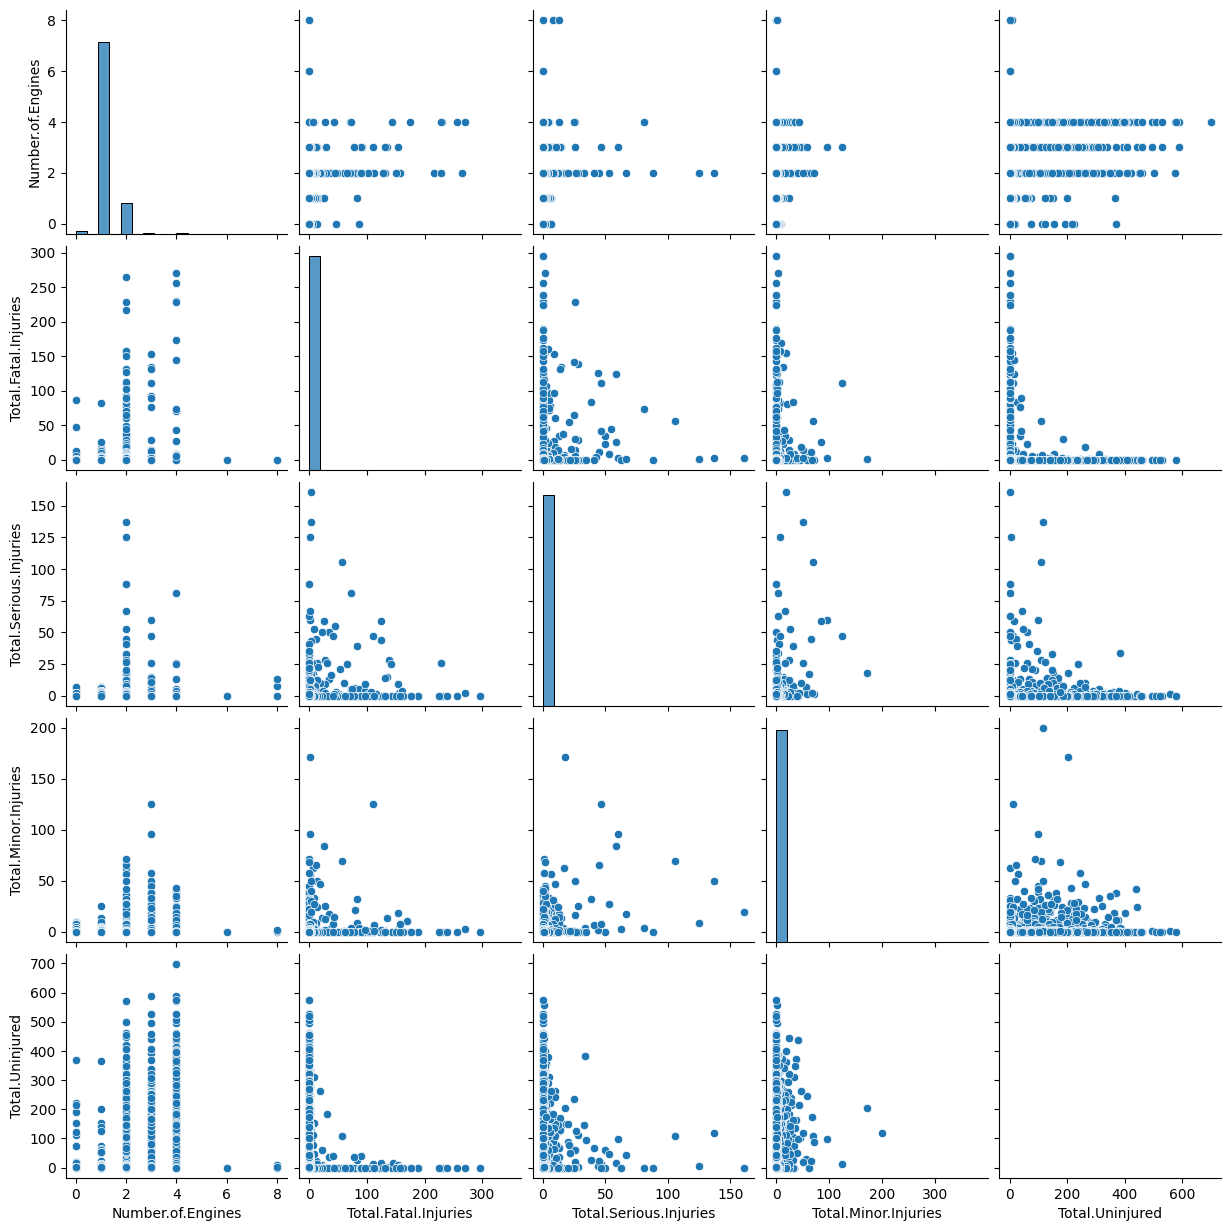

In [7]:
sns.pairplot(data)

In [8]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning

In [9]:
## Missing Values
data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [10]:
data.isna().mean()

,0
Event.Id,0.000000
Investigation.Type,0.000000
Accident.Number,0.000000
Event.Date,0.000000
Location,0.000585
Country,0.002542
Latitude,0.613203
Longitude,0.613304
Airport.Code,0.436016
Airport.Name,0.407081


### Handling missing values

In [11]:
## Drop columns missing values
data.dropna(axis = 1, inplace = True)

In [12]:
data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0


### Handling duplicates

In [13]:
data.duplicated().sum()

26

In [14]:
data.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948
1,20001218X45447,Accident,LAX94LA336,19/07/1962
2,20061025X01555,Accident,NYC07LA005,30/08/1974
3,20001218X45448,Accident,LAX96LA321,19/06/1977
4,20041105X01764,Accident,CHI79FA064,02/08/1979
...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022


There were 26 duplicates, we proceed with data cleaning

### Visualization of data

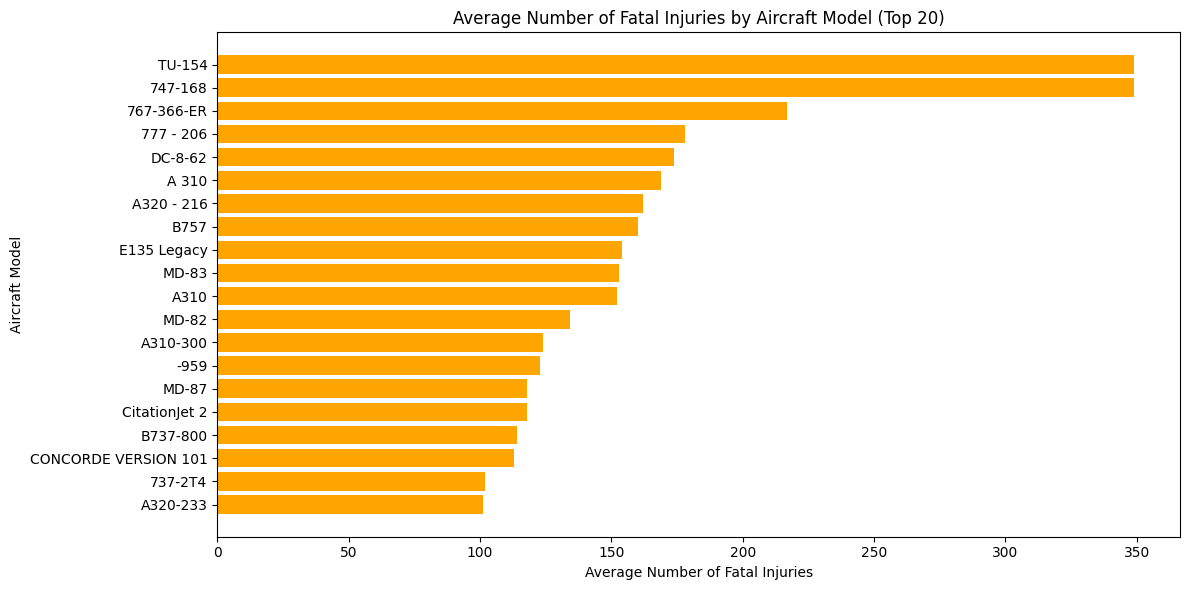

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reloading the dataset
file_path = '/content/AviationData.csv'
aviation_data = pd.read_csv(file_path, encoding='latin1')

# Selecting relevant columns for analysis
relevant_data = aviation_data[
    ['Aircraft.Category', 'Make', 'Model', 'Purpose.of.flight', 'Total.Fatal.Injuries',
     'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
     'Broad.phase.of.flight']
]

# Converting injury columns to numeric for calculations
for col in ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']:
    relevant_data[col] = pd.to_numeric(relevant_data[col], errors='coerce')

# Grouping data by Make and Model to calculate average incidents and injuries
risk_summary_avg = relevant_data.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()

# Adding a column for average total incidents
risk_summary_avg['Avg.Incidents'] = (
    risk_summary_avg['Total.Fatal.Injuries'] +
    risk_summary_avg['Total.Serious.Injuries'] +
    risk_summary_avg['Total.Minor.Injuries'] +
    risk_summary_avg['Total.Uninjured']
)

# Sorting by Average Fatal Injuries for the plot
risk_summary_avg_sorted = risk_summary_avg.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Filter the data for aircraft models with recorded average fatal injuries
fatal_injuries_avg_data = risk_summary_avg_sorted[risk_summary_avg_sorted['Total.Fatal.Injuries'] > 0]

# Plot the average number of fatal injuries versus aircraft model
plt.figure(figsize=(12, 6))
plt.barh(fatal_injuries_avg_data['Model'].head(20), fatal_injuries_avg_data['Total.Fatal.Injuries'].head(20), color='orange')
plt.xlabel('Average Number of Fatal Injuries')
plt.ylabel('Aircraft Model')
plt.title('Average Number of Fatal Injuries by Aircraft Model (Top 20)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


The graphs shows that the model TU-154 has the highest average number of fatal injuries

## Findings
From the analysis, the following has been identified;
1. Total fatalities linked to each aircraft model.
2. Number of recorded incidents for each model.
3. The proportion of fatalities to total incidents for each model.

From this analysis low-risk aircraft models with zero fatalities and minimal serious injuries have been proposed making them strong candidates for commercial or private operations.


## Recommendations
The recommendation from the analysis is to focus on acquiring aircraft models with a history of zero fatalities, such as: SCHWEIZER SGU 2-22CK, WHITE New Standard, NANCHANG CJ-6 and NALIS GLASTAR.

The company should also prioritize models designed for commercial-grade operations over private or experimental aircraft, as they are generally subject to stricter regulatory and safety standards.